<a href="https://colab.research.google.com/github/CodingCat-Jung/2024-2_BigDataProgramming_Class/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D13%EC%A3%BC%EC%B0%A8_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

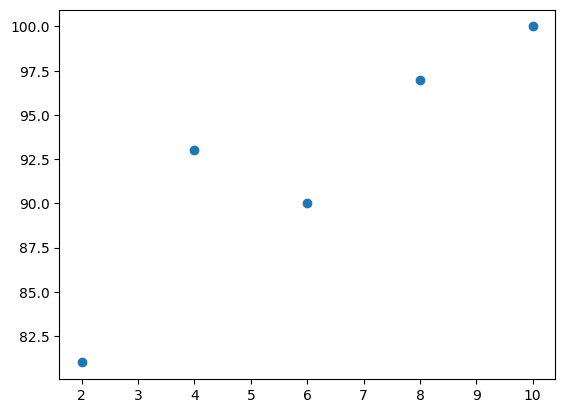

[[94.3]]


In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# 독립변수 X (공부시간) - 원인이 되는 변수
x = [[2], [4], [6], [8], [10]]

# 종속변수 Y (시험점수)
y = [[81], [93], [90], [97], [100]]

plt.scatter(x, y)
plt.show()

# 1. 객체 생성
model = LinearRegression()

# 2. 학습
model.fit(x, y)

# 3. 예측
result = model.predict([[7]])
print(result)

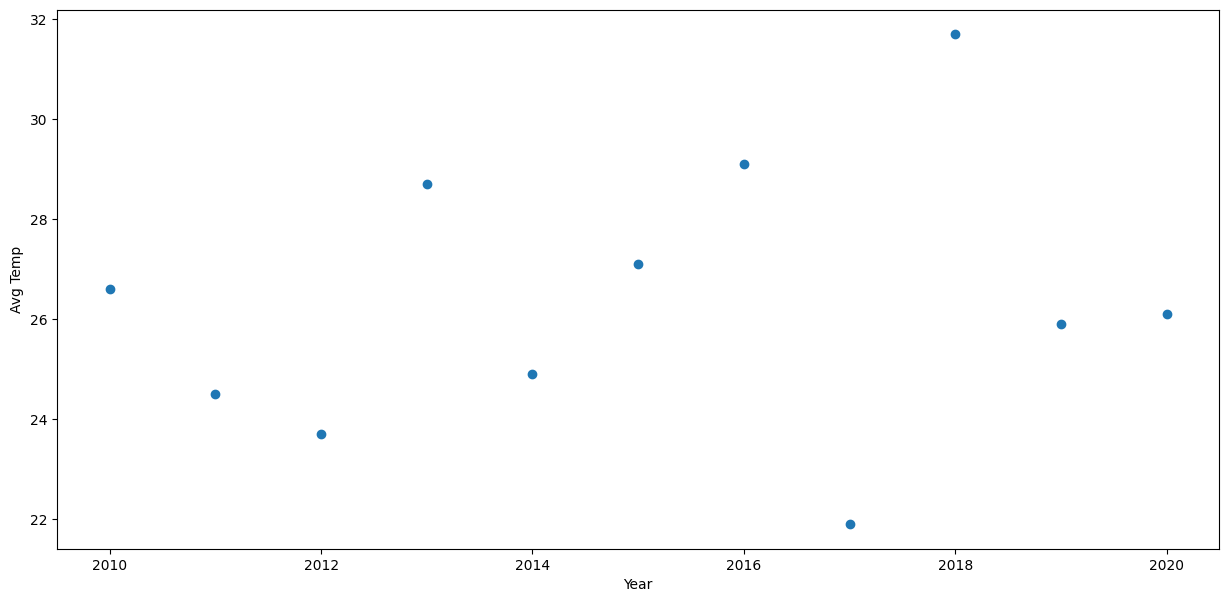

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  f.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  f.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  f.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  f.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  f.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  f.tight_layout()
/usr/local/lib/pyth

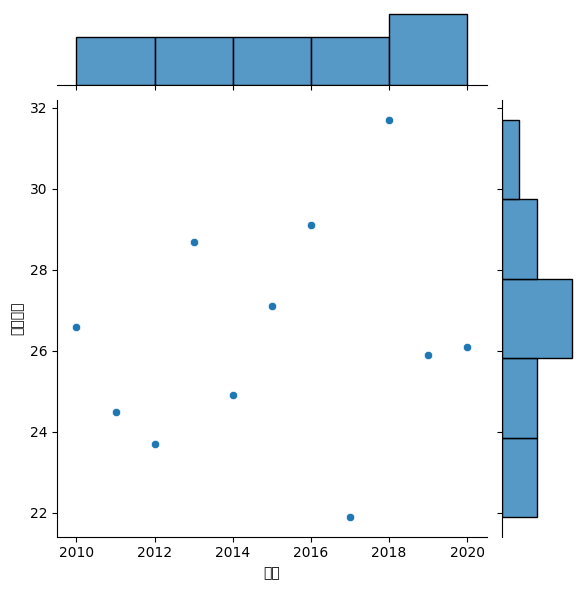

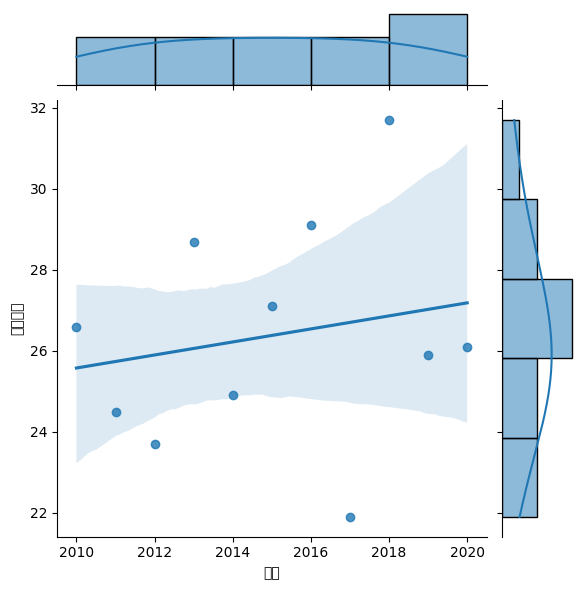

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[[27.50818182]]


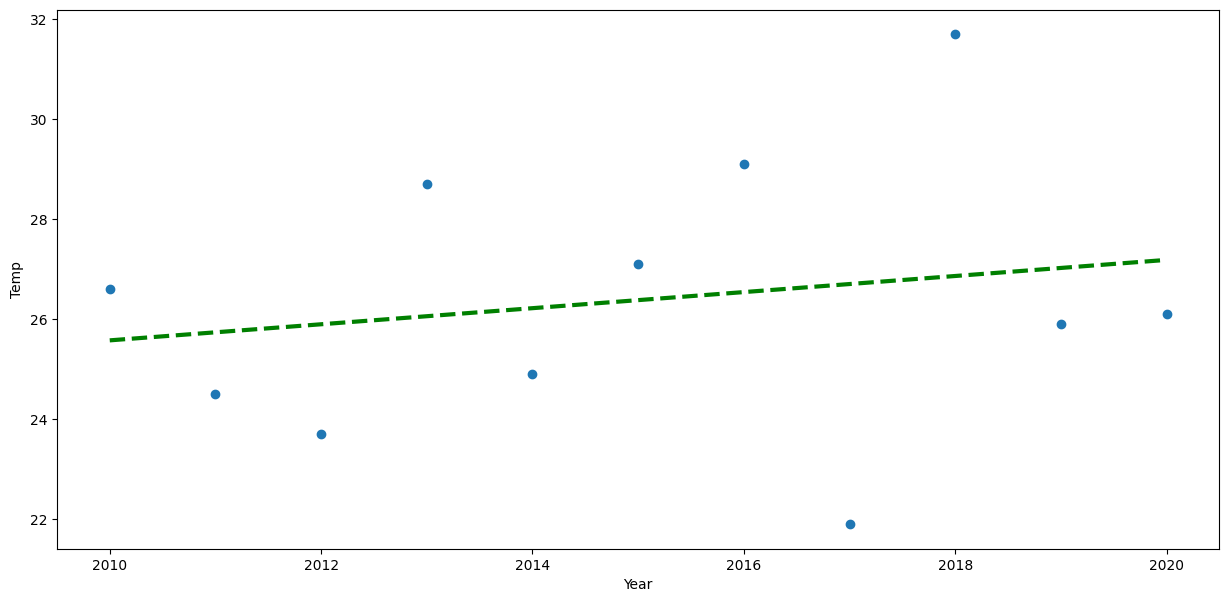

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

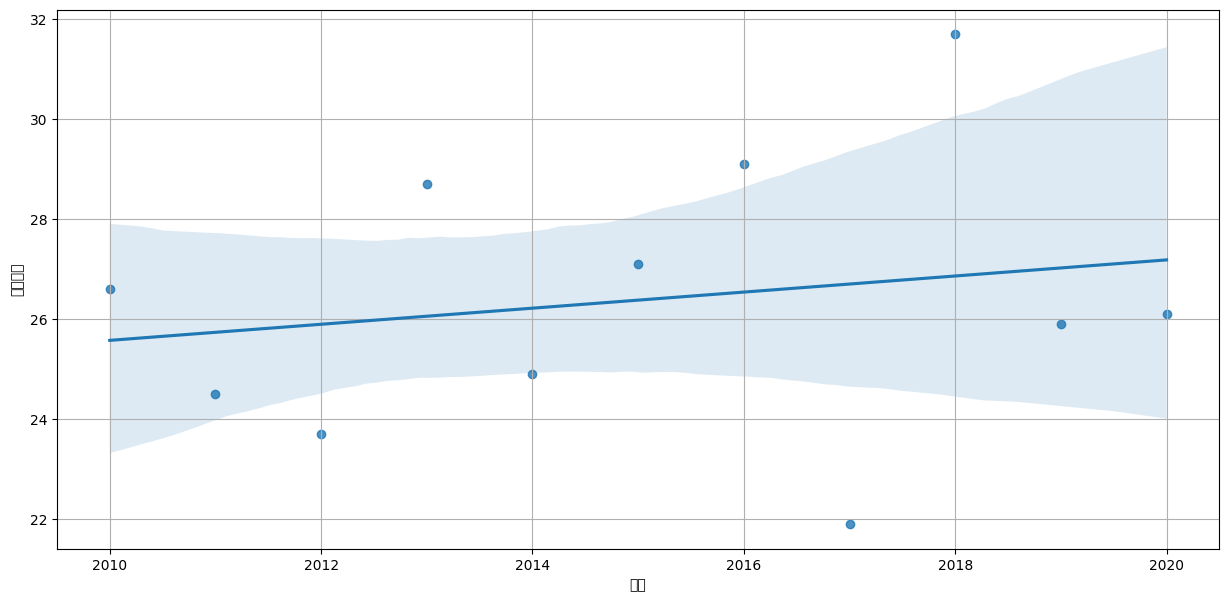

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np

seoul = pd.read_excel('(2010-2020) weather.xlsx')
seoul.describe()

seoul.drop('지점', axis = 1, inplace = True)

seoul.columns = ['날짜', '평균기온', '최저기온', '최고기온']

# 결측치
# seoul.isnull().sum()
seoul.dropna(subset=['최고기온'], axis = 0, inplace = True)
seoul.isnull().sum()

# 10년 동안의 기온 데이터 중에서 매년 8월 15일의 기온 데이터만 추출
# 컬럼 추가
seoul['년도'] = seoul['날짜'].dt.year
# seoul['월'] = seoul['날짜'].dt.month
# seoul['일'] = seoul['날짜'].dt.day

# seoul.head()

# 8월 15일 데이터만 추출
conditions = (seoul['날짜'].dt.month == 8) & (seoul['날짜'].dt.day == 15)
seoul0815 = seoul [conditions]
seoul0815.isnull().sum()

fig = plt.figure(figsize=(15, 7))
x = seoul0815[['년도']]
y = seoul0815[['평균기온']]
plt.xlabel('Year')
plt.ylabel('Avg Temp')
plt.scatter(x, y)
plt.show()

# jointplot
sns.jointplot(x = '년도', y = '평균기온', data = seoul0815)
sns.jointplot(x = '년도', y = '평균기온', kind = 'reg', data = seoul0815)
plt.show()

# 단순 선형 회귀 분석 : 2022년 08월 15일 기온 예측하기
model = LinearRegression()

x = seoul0815[['년도']]
y = seoul0815[['평균기온']]

model.fit(x, y)

result = model.predict([[2022]])
print(result)

# 선형 회귀선 출력하기
x = seoul0815['년도']
y = seoul0815['평균기온']

fp1 = np.polyfit(x, y, 1)
f1 = np.poly1d(fp1)
fx = np.linspace(2010, 2020)

plt.figure(figsize=(15, 7))
plt.scatter(x, y)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('Year')
plt.ylabel('Temp')
plt.show()

fig = plt.figure(figsize=(15, 7))
sns.regplot(x = '년도', y = '평균기온', data = seoul0815)
plt.grid()
plt.show()

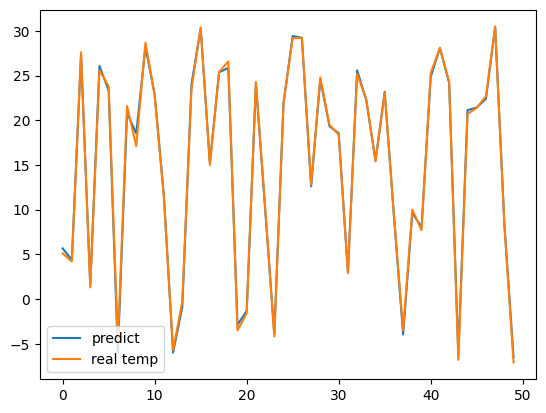

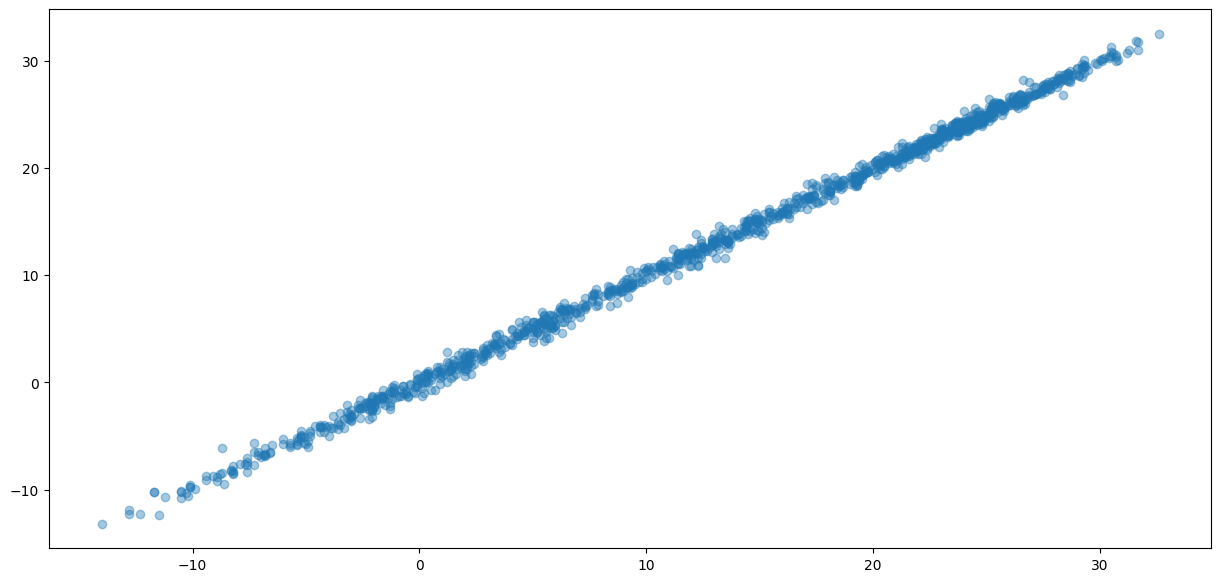

0.9978876889064067


In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

x = seoul[['년도', '최저기온', '최고기온']]
y = seoul[['평균기온']]

# train_test_split 함수를 통해서 7:3의 비율로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3)

# 다중 선형 모델 생성
model = LinearRegression()

# 학습
model.fit(x_train, y_train)

# 모델 테스트 (test셋의 일부로 예측결과 확인)
plt.plot(model.predict(x_test[:50]), label = 'predict')
plt.plot(y_test[:50].values.reshape(-1, 1), label = 'real temp')
plt.legend()

plt.figure(figsize = (15, 7))
y_predict = model.predict(x_test)
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

# score 메소드를 통해 성능 측정
print(model.score(x_test, y_test))
